In [1]:
# this module keeps the code update, so I can use new function directly after modifying code
using PyPlot
using Revise

using RealNeuralNetworks.Neurons
using JLD2
using RealNeuralNetworks.SWCs


const DATASET_DIR = expanduser("../01_data")

NEURON_DIR = "$(DATASET_DIR)/atlas/bin"

using RealNeuralNetworks
using RealNeuralNetworks.SWCs
using RealNeuralNetworks.Neurons
using RealNeuralNetworks.Neurons.Segments
using DataFrames
using Plots
using Query
using JLD2
using Statistics
using LinearAlgebra
using JuliaDB
using ProgressMeter

# Plots.plotly()
# Plots.InspectDRBackend()
# Plots.pyplot()

df = DataFrame()

dirName = NEURON_DIR
@show dirName

dirName = "../01_data/atlas/bin"


┌ Warning: /usr/people/jingpeng/.julia/packages/Plots/qZHsp/src/Plots.jl/ is not an existing directory, Revise is not watching
└ @ Revise /usr/people/jingpeng/.julia/packages/Revise/S7mrl/src/Revise.jl:489


"../01_data/atlas/bin"

# Real neurons with total path length larger than 40 micron

In [2]:
using JSON
neuronIdList = JSON.parsefile(joinpath(DATASET_DIR, "neuron_ids.json"))["valid_20000"]

3075-element Array{Any,1}:
 76181
 76182
 76183
 76184
 76185
 76186
 76187
 76188
 76189
 76190
 76191
 76192
 76193
     ⋮
 83327
 83335
 83337
 83338
 83339
 83340
 83343
 83346
 83351
 83353
 83354
 83357

In [35]:
# using DataStructures
neuronId2neuron = Dict{Int,Neuron}()

skippedNeuronIdList = Int[]
newNeuronIdList = Int[]
totalPathLengthList = Float32[]

# @showprogress 1 "read neurons" for (index, fileName) in enumerate( readdir( NEURON_DIR  ))
@showprogress 1 "read neurons" for neuronId in neuronIdList
#     fullName = joinpath(NEURON_DIR, fileName)
#     neuronId = Meta.parse(split(fileName, ".")[1])
    fullName = joinpath(DATASET_DIR, "atlas/bin/$(neuronId).bin")
    neuron =  Neurons.load(fullName)
    
    totalPathLength = Neurons.get_total_path_length( neuron )  
    
    
    neuronId2neuron[neuronId] = neuron
    # only keep the neurons with path length larger than 40 microns
    if Neurons.get_total_path_length(neuron) > Float32(20000)
        push!(totalPathLengthList, totalPathLength)
        push!(newNeuronIdList, neuronId)
        neuronId2neuron[neuronId] = neuron
    else
        push!(skippedNeuronIdList, neuronId)
    end
end  

neuronIdList = newNeuronIdList
df[:neuronId] = neuronIdList;

println("skipped ", length(skippedNeuronIdList), " neurons: ", skippedNeuronIdList)

┌ Warning: /usr/people/jingpeng/.julia/packages/Plots/qZHsp/src/init.jl__@require__ no longer exists, deleting all methods
└ @ Revise /usr/people/jingpeng/.julia/packages/Revise/S7mrl/src/Revise.jl:544
read neurons100%|███████████████████████████████████████| Time: 0:01:41


skipped 0 neurons: Int64[]


┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[35]:30
└ @ Core In[35]:30


In [4]:
println("skipped ", length(skippedNeuronIdList), " neurons: ", skippedNeuronIdList)
d = JSON.parsefile(joinpath(DATASET_DIR, "neuron_ids.json"))
d["analysis"] = neuronIdList
open(joinpath(DATASET_DIR, "neuron_ids.json"), "w") do f
    write(f, JSON.json(d))
end

skipped 0 neurons: Int64[]


95132

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[5]:1
└ @ Core In[5]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[5]:2
└ @ Core In[5]:2


total path length is 1425.843072 mm


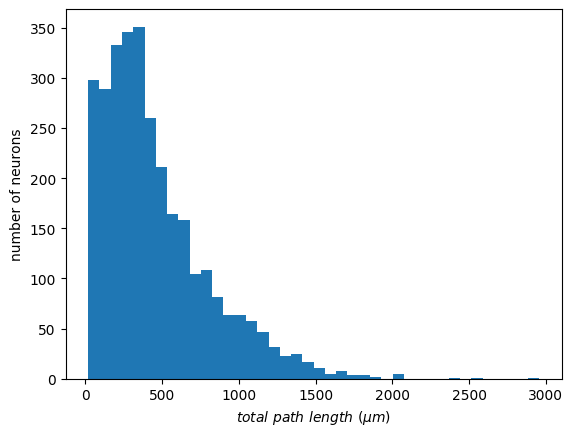

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[5]:8
└ @ Core In[5]:8


PyObject Text(24.000000000000007, 0.5, 'number of neurons')

In [5]:
df[:totalPathLength] = totalPathLengthList

p = histogram(df[:totalPathLength]./1000, leg=false, nbins=50)
xlabel!(p, "total path length (\u03BCm)")
ylabel!(p, "count of cells")

println("total path length is ", sum( totalPathLengthList ) / 1e6, " mm")


PyPlot.plt[:hist](totalPathLengthList./1000, bins=40)
PyPlot.xlabel(L"total\ path\ length\ (\mu m)")
PyPlot.ylabel("number of neurons")
# PyPlot.xlim(0,100)

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[36]:7
└ @ Core In[36]:7
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[36]:9
└ @ Core In[36]:9


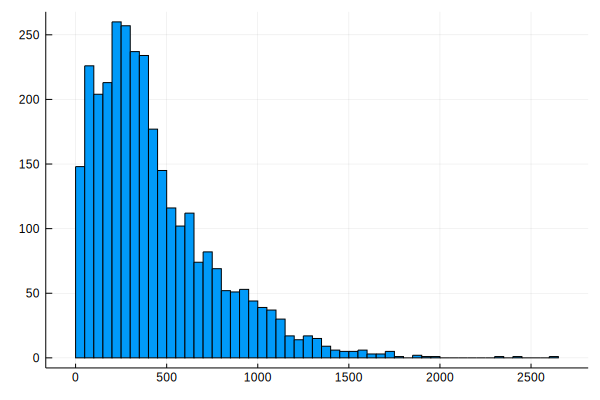

sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file


In [36]:
totalAxonPathLengthList = Vector{Float32}()
for (neuronId, neuron) in neuronId2neuron 
    #println("compute total path length of $cellId ...")
    totalAxonPathLength = Neurons.get_total_path_length( neuron; class=Neurons.Segments.AXON_CLASS )  
    push!(totalAxonPathLengthList, totalAxonPathLength)
end  

df[:totalAxonPathLength] = totalAxonPathLengthList

p = histogram(df[:totalAxonPathLength]./1000, leg=false, nbins=50)
xlabel!(p, L"total\ axon\ path\ length\ (\mu m)")
ylabel!(p, L"count\ of\ cells")

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[37]:7
└ @ Core In[37]:7
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[37]:9
└ @ Core In[37]:9


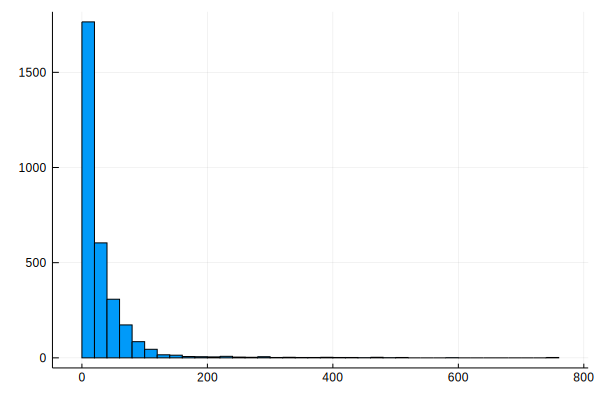

sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file


In [37]:
totalDendPathLengthList = Vector{Float32}()
for (neuronId, neuron) in neuronId2neuron 
    #println("compute total path length of $cellId ...")
    totalDendPathLength = Neurons.get_total_path_length( neuron; class=Neurons.Segments.DENDRITE_CLASS )  
    push!(totalDendPathLengthList, totalDendPathLength)
end  

df[:totalDendPathLength] = totalDendPathLengthList

p = histogram(df[:totalDendPathLength]./1000, leg=false, nbins=50)
xlabel!(p, L"total\ dendrite\ path\ length\ (\mu m)")
ylabel!(p, L"count\ of\ cells")
# xlim(0, 400)

In [ ]:
preSynapseNumList = Vector{Int}()
postSynapseNumList = Vector{Int}()
for (neuronId, neuron) in neuronId2neuron 
    #println("compute total path length of $cellId ...")
    preSynapseNum = Neurons.get_num_pre_synapses( neuron )  
    push!(preSynapseNumList, preSynapseNum)
    
    postSynapseNum = Neurons.get_num_post_synapses( neuron )  
    push!(postSynapseNumList, postSynapseNum)
end  

df[:preSynapseNum] = preSynapseNumList
df[:postSynapseNum] = postSynapseNumList

# p = histogram(df[:totalDendPathLength]./1000, leg=false, nbins=50)
# xlabel!(p, L"total\ dendrite\ path\ length\ (\mu m)")
# ylabel!(p, L"count\ of\ cells")
# xlim(0, 400)

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[8]:8
└ @ Core In[8]:8


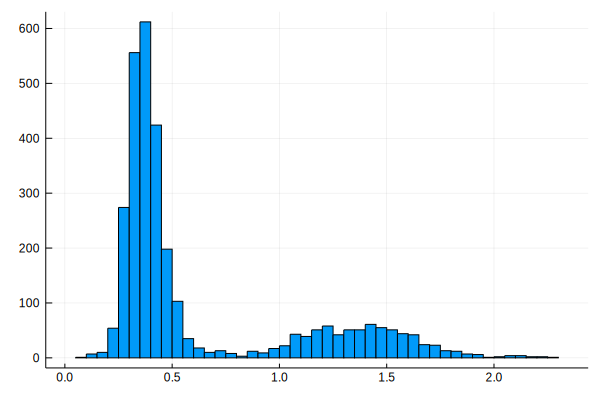

sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file


In [8]:
const ROOT_RADIUS_THRESHOLD = 800
rootRadiusList = Vector{Float32}()
@showprogress 1 "compute root radius..." for (neuronId,neuron) in neuronId2neuron
    #root = Neurons.get_root_node(neuron)
    root = Neurons.get_root_node( neuron )
    push!(rootRadiusList, root[4])
end 

df[:rootRadius] = rootRadiusList

p = Plots.histogram( rootRadiusList./1000, leg=false, nbins = 70 )
xlabel!(p, L"root\ node\ radius\ (\mu m)")
ylabel!(p, L"count\ of\ neurons")

# PyPlot.plt[:hist](rootRadiusList./1000, bins=70)
# PyPlot.xlabel(L"root\ node\ radius\ (\mu m)")
# PyPlot.ylabel("count of neurons")

In [9]:
using Query
q = @from i in df begin
     @where i.rootRadius > ROOT_RADIUS_THRESHOLD
     @select {i.neuronId}
     @collect DataFrame
end
neuronIdListWithSoma = q[:neuronId]
@save "neuron_id_list_with_soma.jld" neuronIdListWithSoma

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[9]:7
└ @ Core In[9]:7


In [10]:
averageBranchingAngleList = Vector{Float32}()
for (neuronId, neuron) in neuronId2neuron
    branchingAngleList = map(i->Neurons.get_branching_angle(neuron,i), 
                                                        1:Neurons.get_num_segments(neuron))
    push!(averageBranchingAngleList, mean(branchingAngleList))
end 

df[:averageBranchingAngle] = averageBranchingAngleList

# PyPlot.plt[:hist](averageBranchingAngleList, bins=90)
# PyPlot.xlabel("average branching angle")
# PyPlot.ylabel("count of neurons")

histogram(averageBranchingAngleList, leg=false, nbins=50,
            xlabel="average branching angle",
            ylabel="count of neurons")

UndefVarError: UndefVarError: normalize not defined

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[11]:7
└ @ Core In[11]:7


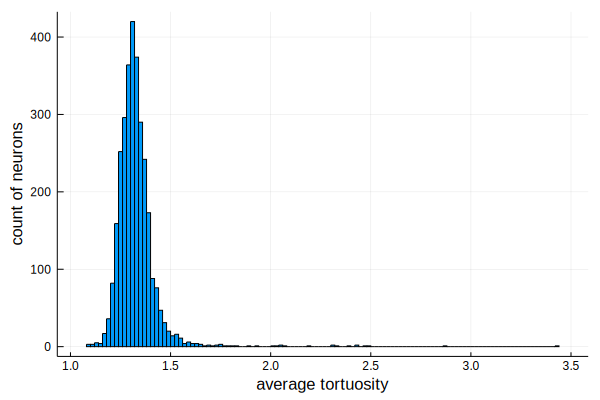

In [11]:
using RealNeuralNetworks.Neurons.Segments
averageTortuosityList = Vector{Float32}()
for (neuronId, neuron) in neuronId2neuron
    tortuosityList = map(Neurons.Segments.get_tortuosity, Neurons.get_segment_list(neuron))
    push!(averageTortuosityList, mean(tortuosityList))
end 

df[:averageTortuosity] = averageTortuosityList

# PyPlot.plt[:hist](averageTortuosityList, bins=20)
# PyPlot.xlabel("average tortuosity")
# PyPlot.ylabel("count of neurons")

histogram(averageTortuosityList, leg=false,
            xlabel="average tortuosity",
            ylabel="count of neurons")

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[12]:2
└ @ Core In[12]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[12]:3
└ @ Core In[12]:3


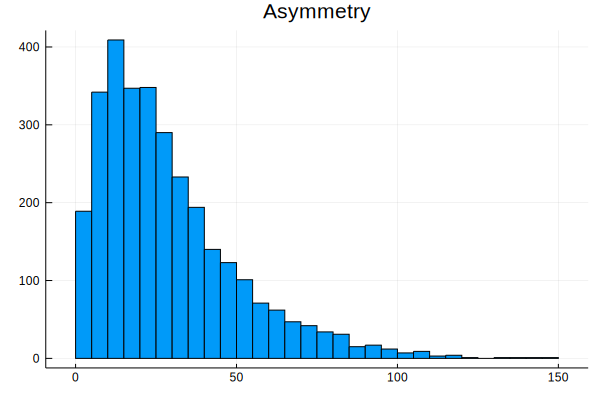

sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file


In [12]:
asymmetryList = map(Neurons.get_asymmetry, values(neuronId2neuron))
df[:asymmetry] = asymmetryList



histogram(df[:asymmetry]./1000, leg=false, nbins=40,
            title="Asymmetry",
            xlabel=L"euclidean\ distance\ from\ soma\ to\ center\ of\ skeleton\ mass\ (\mu m)",
            ylabel=L"count\ of\ neurons")

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[13]:2
└ @ Core In[13]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[13]:3
└ @ Core In[13]:3


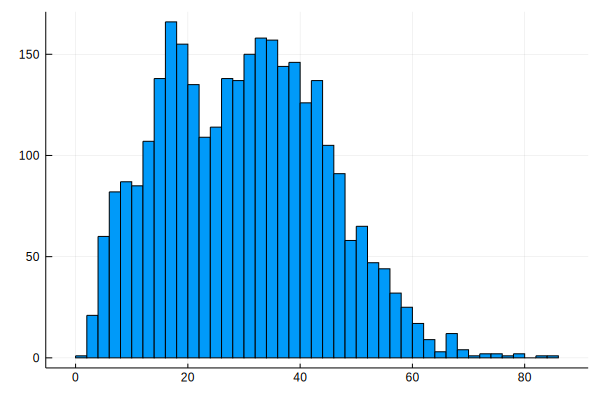

sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file


In [13]:
typicalRadiusList = map(Neurons.get_typical_radius, values(neuronId2neuron))
df[:typicalRadius] = typicalRadiusList
histogram(df[:typicalRadius]./1000, leg=false, nbins=40,
        xlabel=L"typical\ radius\ (\mu m)",
        ylabel=L"count\ of\ neurons")

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[14]:6
└ @ Core In[14]:6
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[14]:8
└ @ Core In[14]:8


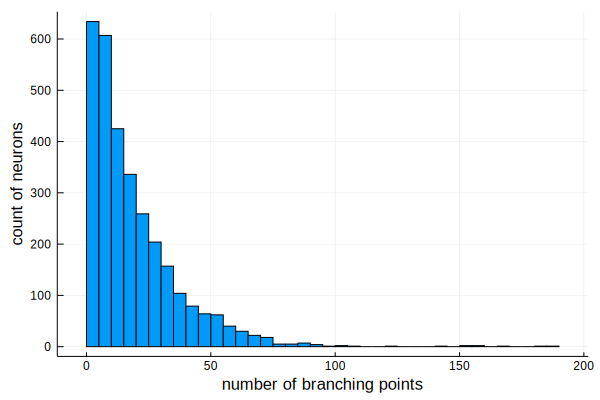

In [14]:
numBranchingPointList = Vector{Int}()
for (neuronId, neuron) in neuronId2neuron
    numBranchingPoint = Neurons.get_num_branching_points(neuron)    
    push!(numBranchingPointList, numBranchingPoint) 
end  

df[:numBranchingPoint] = numBranchingPointList

p = histogram(df[:numBranchingPoint], leg=false, nbins=50)
xlabel!(p, "number of branching points")
ylabel!(p, "count of neurons")

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[15]:7
└ @ Core In[15]:7


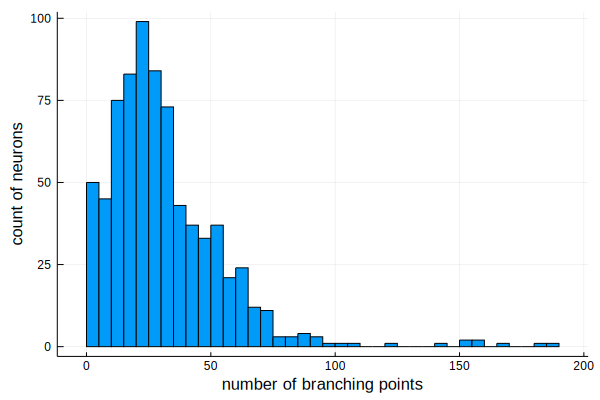

In [15]:
using Query
q = @from i in df begin
     @where i.rootRadius > ROOT_RADIUS_THRESHOLD
     @select {numBranchingPoint=i.numBranchingPoint}
     @collect DataFrame
end
p = histogram(q[:numBranchingPoint], leg=false, nbins=40)
xlabel!(p, "number of branching points")
ylabel!(p, "count of neurons")

In [16]:
q = @from i in df begin
     @where i.numBranchingPoint > 300
     @select {neuronId = i.neuronId, numBranchingPoint=i.numBranchingPoint}
     @collect DataFrame
end
q

,neuronId,numBranchingPoint
,Int64,Int64


┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[17]:8
└ @ Core In[17]:8
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[17]:10
└ @ Core In[17]:10
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[17]:11
└ @ Core In[17]:11


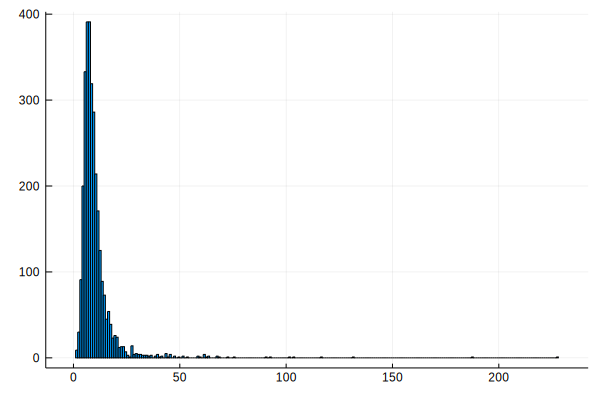

sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file


In [17]:
medianBranchPathLengthList = Vector{Float64}()
maxBranchPathLengthList = Vector{Float64}()
for (neuronId, neuron) in neuronId2neuron
    branchPathLengthList = Neurons.get_segment_path_length_list( neuron )
    push!(medianBranchPathLengthList, median(branchPathLengthList))
    push!(maxBranchPathLengthList, maximum(branchPathLengthList))
end  

df[:medianBranchPathLength] = medianBranchPathLengthList
df[:maxBranchPathLength] = maxBranchPathLengthList 
p = histogram(df[:medianBranchPathLength]./1000, leg=false,
            xlabel=L"median\ of\ branch\ path\ length\ (\mu m)",
            ylabel=L"count\ of\ neurons")

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[18]:7
└ @ Core In[18]:7


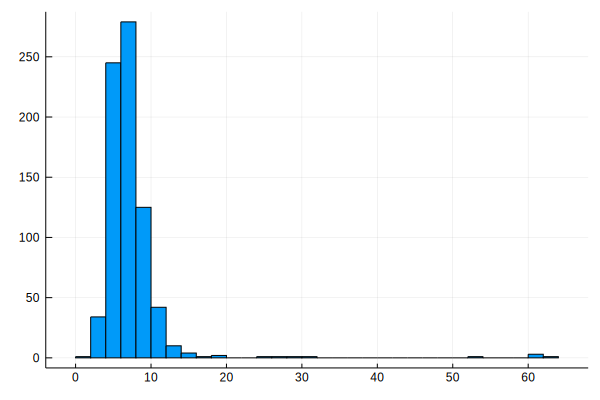

sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file


In [18]:
using Query
q = @from i in df begin
     @where i.rootRadius > ROOT_RADIUS_THRESHOLD
     @select {medianBranchPathLength=i.medianBranchPathLength}
     @collect DataFrame
end
p = histogram(q[:medianBranchPathLength]./1000, leg=false, nbins=40,
            xlabel=L"median\ of\ branch\ path\ length\ with\ soma\ (\mu m)",
            ylabel=L"count\ of\ neurons")

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[19]:1
└ @ Core In[19]:1


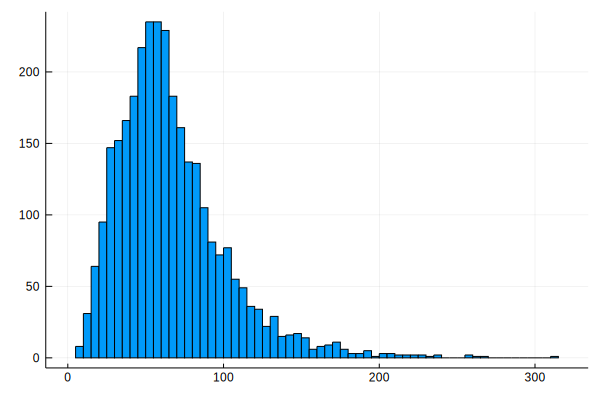

sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file


In [19]:
p = histogram(df[:maxBranchPathLength]./1000, leg=false)
xlabel!(p, L"max\ of\ branch\ path\ length\ (\mu m)")
ylabel!(p, L"count\ of\ neurons")

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[20]:7
└ @ Core In[20]:7


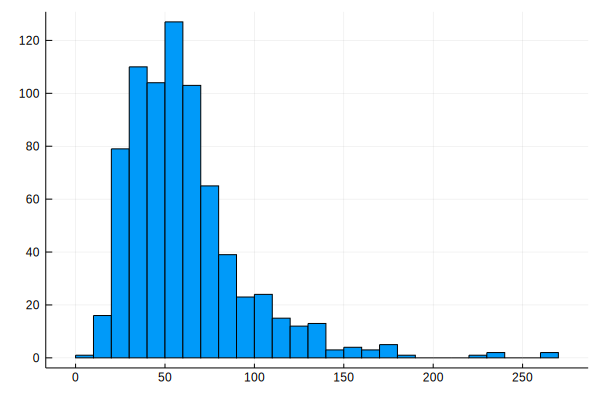

sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file
sh: 1: latex: not found
latex: failed to create a dvi file


In [20]:
using Query
q = @from i in df begin
     @where i.rootRadius > ROOT_RADIUS_THRESHOLD
     @select {maxBranchPathLength=i.maxBranchPathLength}
     @collect DataFrame
end
p = histogram(q[:maxBranchPathLength]./1000, leg=false, nbins=40)
xlabel!(p, L"maximum\ branch\ path\ length\ (\mu m)")
ylabel!(p, L"count\ of\ neurons")

### Convex Hull

In [21]:
# # remove cell 76388 which is too small to compute convex hull
# q = @from i in df begin
#      @where i.neuronId != 76388 && i.neuronId!=79514
#      @select i
#      @collect DataFrame
# end
# df = q

┌ Info: Precompiling QHull [a8468747-bd6f-53ef-9e5c-744dbc5c59e7]
└ @ Base loading.jl:1273
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = macro expansion at ProgressMeter.jl:710 [inlined]
└ @ Core /usr/people/jingpeng/.julia/packages/ProgressMeter/g1lse/src/ProgressMeter.jl:710
computing convex hull...100%|███████████████████████████| Time: 0:02:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[22]:18
└ @ Core In[22]:18
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[22]:20
└ @ Core In[22]:20


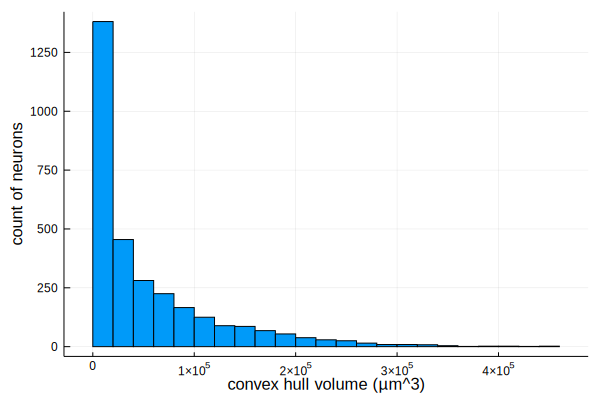

In [22]:
# convex hull analysis
using QHull
using ProgressMeter

convexHullVolumeList = Float32[]
convexHullAreaList = Float32[]
@showprogress 1 "computing convex hull..." for neuronId in df[:neuronId]
    neuron = neuronId2neuron[neuronId]
    nodeList = Neurons.get_node_list(neuron)
    points = zeros((length(nodeList), 3))
    for (i,node) in enumerate(nodeList)
        points[i,:] = [nodeList[i][1:3]...]
    end 
    ch = chull(points)
    push!(convexHullVolumeList, ch.volume)
    push!(convexHullAreaList, ch.area)
end

df[:convexHullVolume] = Vector{Float32}( convexHullVolumeList )
df[:convexHullArea] = Vector{Float32}( convexHullAreaList )

p = histogram(convexHullVolumeList ./ 1e9, leg=false, nbins=40)
xlabel!(p, "convex hull volume (\u00B5m^3)")
ylabel!(p, "count of neurons")

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = macro expansion at ProgressMeter.jl:710 [inlined]
└ @ Core /usr/people/jingpeng/.julia/packages/ProgressMeter/g1lse/src/ProgressMeter.jl:710
compute surface area...100%|████████████████████████████| Time: 0:00:54
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[23]:10
└ @ Core In[23]:10
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[23]:12
└ @ Core In[23]:12


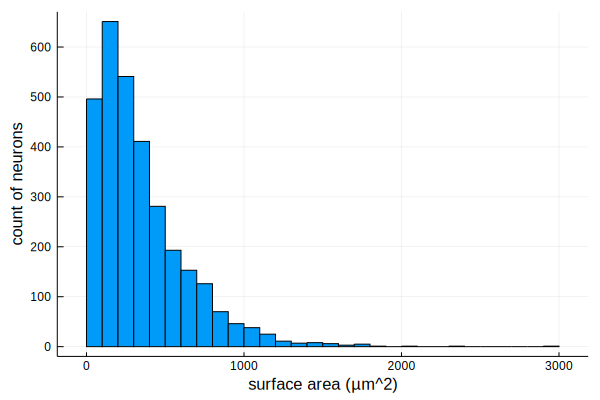

In [23]:
# frustum-based surface area and volume
surfaceAreaList = Float32[]
volumeList = Float32[]

@showprogress 1 "compute surface area..." for neuronId in df[:neuronId]
    neuron = neuronId2neuron[neuronId]
    push!(surfaceAreaList, Neurons.get_surface_area(neuron))
    push!(volumeList, Neurons.get_volume(neuron))
end

df[:surfaceArea] = surfaceAreaList
df[:volume] = volumeList

p = histogram(surfaceAreaList./1e6, leg=false, nbins=40)
xlabel!(p, "surface area (\u00B5m^2)")
ylabel!(p, "count of neurons")

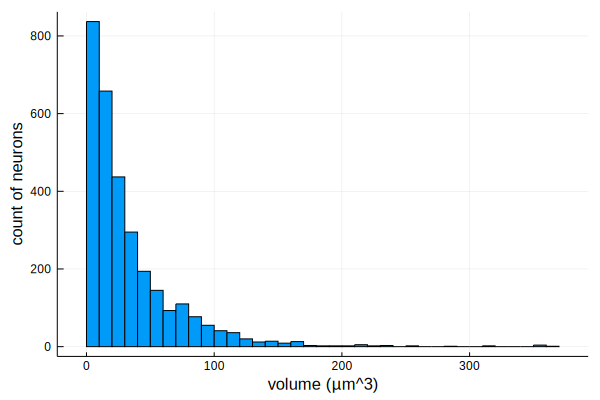

In [24]:
p = histogram(volumeList./1e9, leg=false, nbins=40)
xlabel!(p, "volume (\u00B5m^3)")
ylabel!(p, "count of neurons")

# Save features

In [39]:
# save dataframe
using CSV
@show size(df)
@assert DataFrames.ncol(df) >= 14
CSV.write("$(DATASET_DIR)/features.csv", df)

size(df) = (3075, 15)


"../01_data/features.csv"

# Clustering

In [26]:
# data frame only contain neurons
# using Que
ndf = @from i in df begin
     @where i.rootRadius > ROOT_RADIUS_THRESHOLD
     @select i
     @collect DataFrame
end

# ndf[:convexHullVolume] |> Vector{Float64}
@show nrow(ndf)

nrow(ndf) = 752


752

In [27]:
using StatsBase
# each column is a sample
sampleMatrix = zeros( size(ndf,2)-1, size(ndf,1)) 
@show size(sampleMatrix)

nameIndex = 0
for name in names(ndf)
    if name != :neuronId
        nameIndex += 1
        @show name, typeof(ndf[name])
        sampleMatrix[ nameIndex, : ] = zscore(ndf[name])
    end 
end 

# construct distance matrix
using Distances
distanceMatrix = pairwise( CosineDist(), sampleMatrix )
@show size(distanceMatrix)
@show maximum(distanceMatrix)
@show minimum(distanceMatrix)
@show cosine_dist(sampleMatrix[1,:], sampleMatrix[2,:])
@show sampleMatrix
# hierachical clustering
using Clustering
clust = Clustering.hclust( distanceMatrix, :average);


size(sampleMatrix) = (14, 752)


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = macro expansion at show.jl:562 [inlined]
└ @ Core ./show.jl:562


(name, typeof(ndf[name])) = (:totalPathLength, Array{Float32,1})
(name, typeof(ndf[name])) = (:totalAxonPathLength, Array{Float32,1})
(name, typeof(ndf[name])) = (:totalDendPathLength, Array{Float32,1})
(name, typeof(ndf[name])) = (:rootRadius, Array{Float32,1})
(name, typeof(ndf[name])) = (:averageTortuosity, Array{Float32,1})
(name, typeof(ndf[name])) = (:asymmetry, Array{Float32,1})
(name, typeof(ndf[name])) = (:typicalRadius, Array{Float64,1})


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[27]:11
└ @ Core ./In[27]:11


(name, typeof(ndf[name])) = (:numBranchingPoint, Array{Int64,1})
(name, typeof(ndf[name])) = (:medianBranchPathLength, Array{Float64,1})
(name, typeof(ndf[name])) = (:maxBranchPathLength, Array{Float64,1})
(name, typeof(ndf[name])) = (:convexHullVolume, Array{Float32,1})
(name, typeof(ndf[name])) = (:convexHullArea, Array{Float32,1})
(name, typeof(ndf[name])) = (:surfaceArea, Array{Float32,1})
(name, typeof(ndf[name])) = (:volume, Array{Float32,1})
size(distanceMatrix) = (752, 752)
maximum(distanceMatrix) = 

┌ Warning: implicit `dims=2` argument now has to be passed explicitly to specify that distances between columns should be computed
│   caller = ip:0x0
└ @ Core :-1


NaN
minimum(distanceMatrix) = NaN
cosine_dist(sampleMatrix[1, :], sampleMatrix[2, :]) = NaN


sampleMatrix = [-0.32827162742614746 -0.05866818502545357 0.20202027261257172 -0.6826934814453125 -0.5576001405715942 -1.20988130569458 0.8284018039703369 -0.44509589672088623 -0.6664722561836243 -0.8765955567359924 -1.1100572347640991 -0.30165907740592957 -1.2635939121246338 0.29396167397499084 0.6411980390548706 1.8146106004714966 -1.2677912712097168 -1.0467798709869385 2.958106279373169 0.9495580792427063 1.0148451328277588 1.275427222251892 4.000628471374512 -0.9577302932739258 1.1450440883636475 -0.42758142948150635 -0.6744464635848999 -0.5339536666870117 1.1138807535171509 3.4112603664398193 0.9574199914932251 2.443869113922119 1.7942593097686768 0.5384363532066345 -0.04554056003689766 0.1519458293914795 -0.6127347350120544 0.14415030181407928 0.5678219795227051 0.5859341621398926 1.79122793674469 0.5058157444000244 0.9432225227355957 2.323979139328003 -0.12184589356184006 -0.07375535368919373 -0.5519495606422424 -0.5088595747947693 -0.33127984404563904 0.4735628068447113 -0.7906

0.7610199451446533 -0.75772625207901 3.747633934020996 2.6232755184173584 -0.5904197096824646 0.2198828160762787 1.090649962425232 -0.656090259552002 -0.14751197397708893 1.4701478481292725 1.0772604942321777 0.4369920492172241 -0.6314694881439209 3.4390389919281006 0.2956891357898712 -0.42638757824897766 0.6282680630683899 -0.8406299948692322 -0.6974743008613586 -0.8061849474906921 0.03734470158815384 -0.6383672952651978 3.1581709384918213 1.583949327468872 0.34277164936065674 -0.000697492272593081 0.0292388666421175 -0.0010298730339854956 -0.4045697748661041 -0.45436471700668335 -0.8155187964439392 -0.7954636812210083 -0.8392460346221924 -0.8118041753768921 -0.6803911924362183 -0.45750120282173157 -0.7654012441635132 -0.8275062441825867 -0.7841930985450745 -0.6438428163528442 -0.5286101698875427 0.4093867540359497 -0.7821146845817566 -0.4833894670009613 -0.8110596537590027 -0.8371403813362122 -0.6213170289993286 0.028154296800494194 -0.5214270949363708 -0.7463293075561523 0.113101899

┌ Info: Precompiling Clustering [aaaa29a8-35af-508c-8bc3-b662a17a0fe5]
└ @ Base loading.jl:1273
┌ Warning: `hclust(d, method::Symbol, uplo::Union{Symbol, Nothing}=nothing)` is deprecated, use `hclust(d, linkage=method, uplo=uplo)` instead.
│   caller = hclust(::Array{Float64,2}, ::Symbol) at deprecated.jl:66
└ @ Clustering ./deprecated.jl:66


ArgumentError: ArgumentError: Distance matrix should be symmetric.

In [28]:
plotly()
import Pkg
include(joinpath(Pkg.dir("RealNeuralNetworks"), "src/Utils/PlotRecipes.jl")); using .PlotRecipes

PlotRecipes.plot(clust)

┌ Info: For saving to png with the Plotly backend ORCA has to be installed.
└ @ Plots /usr/people/jingpeng/.julia/packages/Plots/qZHsp/src/backends.jl:363
┌ Warning: `Pkg.dir(pkgname, paths...)` is deprecated; instead, do `import RealNeuralNetworks; joinpath(dirname(pathof(RealNeuralNetworks)), "..", paths...)`.
└ @ Pkg.API /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.3/Pkg/src/API.jl:673
┌ Info: Precompiling PlotlyJS [f0f68f2c-4968-5e81-91da-67840de0976a]
└ @ Base loading.jl:1273
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-7693028171934463911\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-13217146262794830393\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-7693028171934463911\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-4271216526498869008\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5507205794559944723\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-4271216526498869008\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

UndefVarError: UndefVarError: clust not defined

In [29]:
@show size(sampleMatrix)
@show maximum(distanceMatrix)
@show minimum(distanceMatrix)
@show cosine_dist(sampleMatrix[:,110], sampleMatrix[:, 13])
x = sampleMatrix[:, 110]
y = sampleMatrix[:, 13]
@show dot(x, y) / (norm(x) * norm(y))
for i in 1:size(distanceMatrix,1)
    for j in 1:size(distanceMatrix, 2)
        if distanceMatrix[i,j] > 1.9
            print("$i,$j:$(distanceMatrix[i,j]); ")
        end
    end 
end


size(sampleMatrix) = (14, 752)
maximum(distanceMatrix) = NaN
minimum(distanceMatrix) = NaN
cosine_dist(sampleMatrix[:, 110], sampleMatrix[:, 13]) = NaN
dot(x, y) / (norm(x) * norm(y)) = NaN


In [30]:
#plot heat map
gr()
# rearrange distance matrix according to order
using RealNeuralNetworks.NeuralNets
reorderedDistanceMatrix = NeuralNets.reorder_matrix(distanceMatrix, clust.order)

Plots.heatmap(clust.order, clust.order, reorderedDistanceMatrix,
title="distance matrix based on morphological statistics")


UndefVarError: UndefVarError: clust not defined

In [31]:
# Pearson correlation coefficient matrix
correlationMatrix = zero(distanceMatrix)
for i in 1:size(distanceMatrix, 1)
    for j in i:size(distanceMatrix, 2)
        c = cor( sampleMatrix[:,i], sampleMatrix[:,j] )
        correlationMatrix[i,j] = c
        correlationMatrix[j,i] = c
    end 
end

# rearrange distance matrix according to order
reorderedCorrelationMatrix = zero(correlationMatrix)
for (i,o1) in enumerate(clust.order)
    for (j, o2) in enumerate(clust.order)
        reorderedCorrelationMatrix[i,j] = correlationMatrix[o1,o2]
    end 
end 
Plots.heatmap(clust.order, clust.order, reorderedCorrelationMatrix, 
               title="Pearson correlation coefficient matrix")

UndefVarError: UndefVarError: clust not defined

In [32]:
#fractalDimensionList = Vector{Float64}()
# @everywhere using RealNeuralNetworks.BranchNets
#addprocs(4)
#@time fractalDimensionList = map( n -> BranchNets.get_fractal_dimension(n)[1], values(branchNets) )